In [39]:
# Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import iplot
import os



In [40]:
df = pd.read_csv("./Happiness_data_from_2015_to_2022.csv")
df.head()

,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.29678
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.43630
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.34139
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.34699
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.45811


In [41]:
map_happy = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Happiness Score'], 
           text = df['Country'],
           colorbar = {'title':'Happiness Score'},
           colorscale = 'Viridis')
layout = dict(title = 'Ladder score The World', 
              geo = dict(showframe = False, projection = {'type': 'equirectangular'}))

choromap3 = go.Figure(data = [map_happy], layout=layout)
iplot(choromap3)

In [42]:
top_n = 10

top_df = df[df["Happiness Rank"] <= top_n]

print(top_df.shape)
top_df.head()

(77, 8)


,Country,year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Generosity
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.29678
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.43630
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.34139
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.34699
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.45811


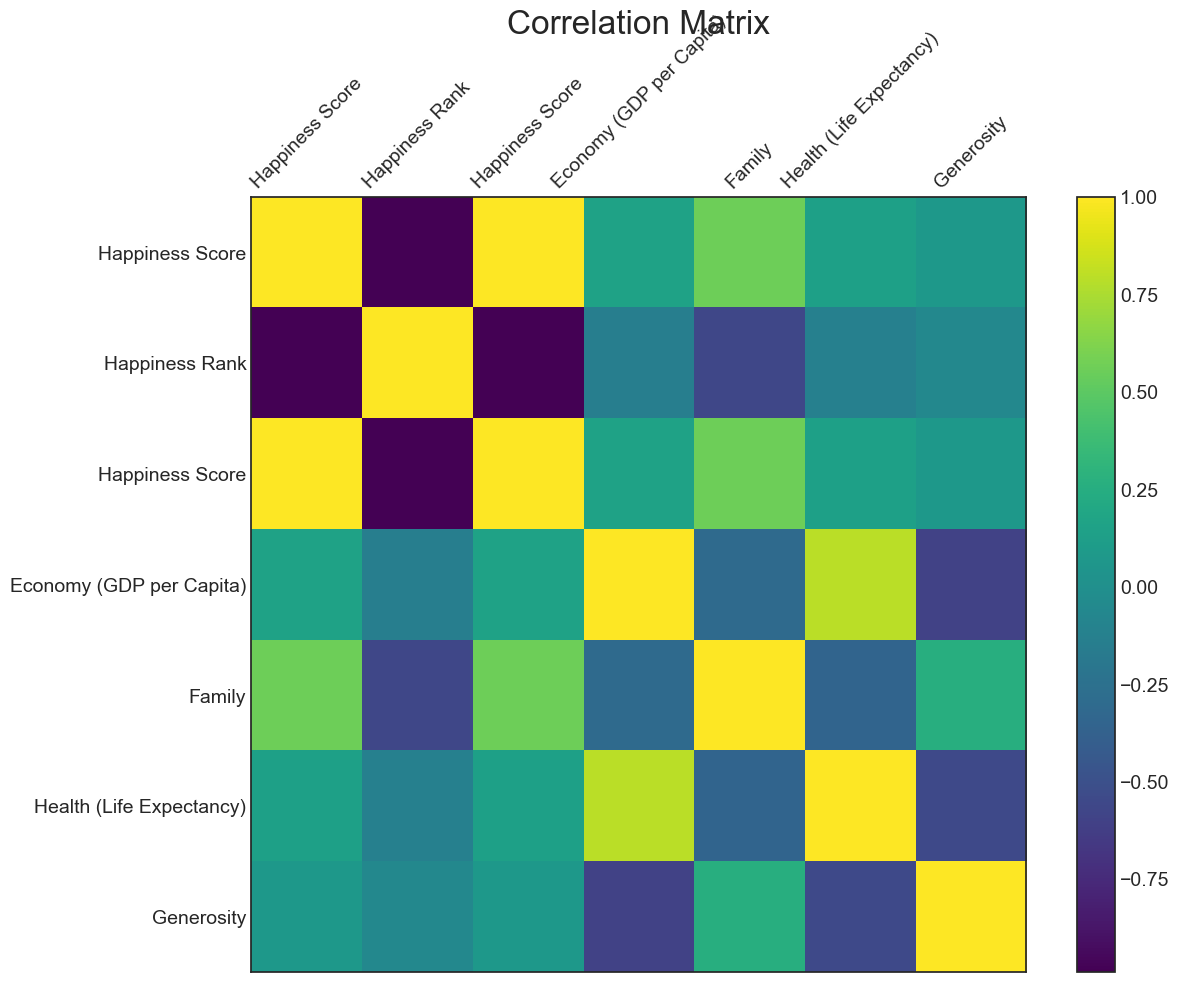

In [46]:
feature_cols = ["Happiness Rank","Happiness Score","Economy (GDP per Capita)", 'Family', 'Health (Life Expectancy)', 'Generosity']
df = pd.concat([df['Happiness Score'], df[feature_cols]], axis = 1)
fig = plt.figure(figsize = (13, 10))
plt.style.use('seaborn-white')
plt.matshow(df.corr(), fignum = fig.number, cmap = 'viridis')
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize = 24, y = 1.2);